In [3]:
# %pip install opencv-python
# %pip install matplotlib

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
import os
import cv2
import math
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
import seaborn as sns
from keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

In [2]:
epochs = 4
batch_size = 32
img_size = 224

In [3]:
labels = ['female', 'male']

def get_data(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[...,::-1] #convert BGR to RGB format
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

# Without Pertubations

In [4]:
train = get_data('preprocessing/train_data')
val = get_data('preprocessing/val_data')

'NoneType' object is not subscriptable
'NoneType' object is not subscriptable


In [5]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train:
    x_train.append(feature)
    y_train.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [6]:
model = Sequential()

model.add(Conv2D(32, 3, 3, activation="relu", input_shape=(224,224,3)))
model.add(MaxPool2D())

model.add(Conv2D(32, 3, 3, padding="same", activation="relu"))
model.add(MaxPool2D())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(2, activation="softmax"))

model.summary()
#-----------------------------------------------------------------
opt = Adam(lr=0.000001)
model.compile(optimizer = opt , 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics = ['accuracy'])
#------------------------------------------------------------------
early_stop = EarlyStopping(monitor='loss', min_delta=0.001, patience=3, mode='min', verbose=1)
checkpoint = ModelCheckpoint('model_best_weights.h5', monitor='loss', verbose=1, # Saves checkpoints
                             save_best_only=True, mode='min', save_freq='epoch')

history = model.fit(x_train,y_train,epochs = epochs , 
                    validation_data = (x_val, y_val), 
                    callbacks = [early_stop,checkpoint])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 74, 74, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1

# With Pertubations

In [7]:
train_pert = get_data('preprocessing/makeup')

'NoneType' object is not subscriptable
'NoneType' object is not subscriptable


In [8]:
x_train = []
y_train = []
x_val = []
y_val = []

for feature, label in train_pert:
    x_train.append(feature)
    y_train.append(label)

for feature, label in val:
    x_val.append(feature)
    y_val.append(label)

# Normalize the data
x_train = np.array(x_train) / 255
x_val = np.array(x_val) / 255

x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

In [9]:
model_pert = Sequential()

model_pert.add(Conv2D(32, 3, 3, activation="relu", input_shape=(224,224,3)))
model_pert.add(MaxPool2D())

model_pert.add(Conv2D(32, 3, 3, padding="same", activation="relu"))
model_pert.add(MaxPool2D())
model_pert.add(Dropout(0.4))

model_pert.add(Flatten())
model_pert.add(Dense(128,activation="relu"))
model_pert.add(Dense(2, activation="softmax"))

model_pert.summary()
#-----------------------------------------------------------------
opt = Adam(lr=0.000001)
model_pert.compile(optimizer = opt , 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics = ['accuracy'])
#------------------------------------------------------------------
early_stop = EarlyStopping(monitor='loss', min_delta=0.001, patience=3, mode='min', verbose=1)
checkpoint = ModelCheckpoint('model_best_weights_pert.h5', monitor='loss', verbose=1, # Saves checkpoints
                             save_best_only=True, mode='min', save_freq='epoch')

history_pert = model_pert.fit(x_train,y_train,epochs = epochs , 
                    validation_data = (x_val, y_val), 
                    callbacks = [early_stop,checkpoint])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 74, 74, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

# Model Evaluation

## Without Pertubation

### Accuracy and Loss

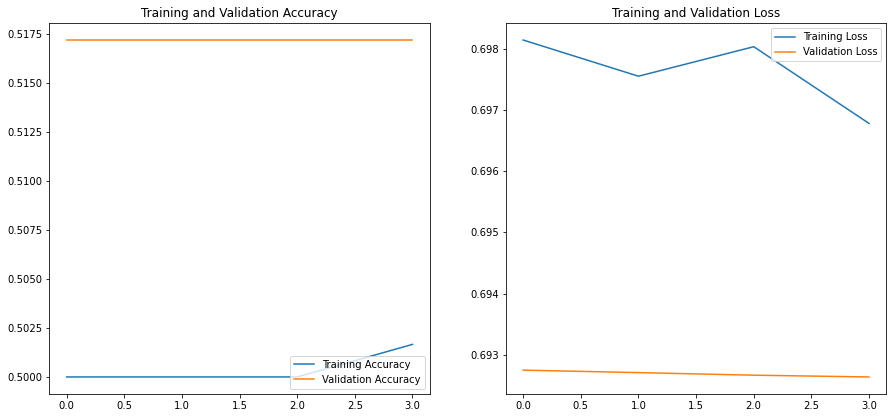

In [10]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Confusion Matrix

In [11]:
num_of_train_samples = 602
num_of_test_samples = 582

In [12]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
validation_generator = test_datagen.flow_from_directory("preprocessing/val_data",
                                                        target_size=(224, 224),
                                                        batch_size=batch_size,
                                                        class_mode='categorical')

Found 587 images belonging to 2 classes.


Instructions for updating:
Please use Model.predict, which supports generators.
Confusion Matrix
[[305   0]
 [282   0]]


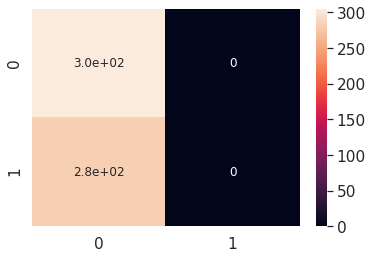

In [14]:
Y_pred = model.predict_generator(validation_generator, num_of_test_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
confusion_matrix_array = confusion_matrix(validation_generator.classes, y_pred)
print(confusion_matrix_array)
df_cm = pd.DataFrame(confusion_matrix_array, range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12}) # font size
plt.show()

### Classification Report

In [15]:
predictions = model.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]

target_names = ['Female (Class 0)','Male (Class 1)']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names, zero_division=1))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
                  precision    recall  f1-score   support

Female (Class 0)       0.52      1.00      0.68       305
  Male (Class 1)       1.00      0.00      0.00       282

        accuracy                           0.52       587
       macro avg       0.76      0.50      0.34       587
    weighted avg       0.75      0.52      0.36       587



## With Pertubation

### Accuracy and Loss

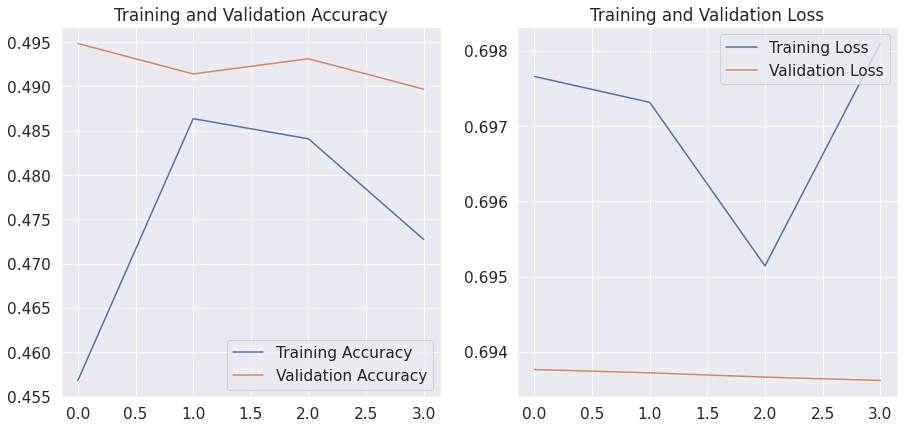

In [16]:
acc = history_pert.history['accuracy']
val_acc = history_pert.history['val_accuracy']
loss = history_pert.history['loss']
val_loss = history_pert.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Confusion Matrix

In [19]:
num_of_train_samples = 602
num_of_test_samples = 582

In [20]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [21]:
validation_generator = test_datagen.flow_from_directory("preprocessing/val_data",
                                                        target_size=(224, 224),
                                                        batch_size=batch_size,
                                                        class_mode='categorical')

Found 587 images belonging to 2 classes.


Confusion Matrix
[[ 91 214]
 [ 74 208]]


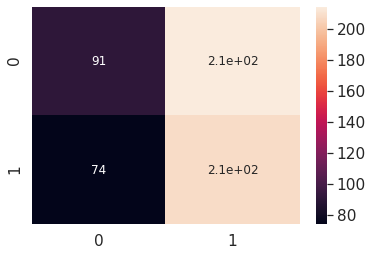

In [22]:
Y_pred = model_pert.predict_generator(validation_generator, num_of_test_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
confusion_matrix_array = confusion_matrix(validation_generator.classes, y_pred)
print(confusion_matrix_array)
df_cm = pd.DataFrame(confusion_matrix_array, range(2), range(2))
# plt.figure(figsize=(10,7))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12}) # font size
plt.show()

### Classification Report

In [24]:
predictions = model_pert.predict_classes(x_val)
predictions = predictions.reshape(1,-1)[0]

target_names = ['Female (Class 0)','Male (Class 1)']
print(classification_report(validation_generator.classes, y_pred, target_names=target_names, zero_division=1))

                  precision    recall  f1-score   support

Female (Class 0)       0.55      0.30      0.39       305
  Male (Class 1)       0.49      0.74      0.59       282

        accuracy                           0.51       587
       macro avg       0.52      0.52      0.49       587
    weighted avg       0.52      0.51      0.49       587



# Making predictions

## Without Pertubation

In [83]:
def predictImage(filename):
    data = []
    class_num = 0
    path = filename
    img_arr = cv2.imread(filename)[...,::-1] #convert BGR to RGB format
    resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
    data.append([resized_arr, class_num])
    val = model.predict_classes(x_k)[0]
    
    img1 = image.load_img(filename,target_size=(img_size,img_size))
    plt.imshow(img1)
    if val == 1:
        plt.xlabel("MALE",fontsize=30)
    elif val == 0:
        plt.xlabel("FEMALE",fontsize=30)

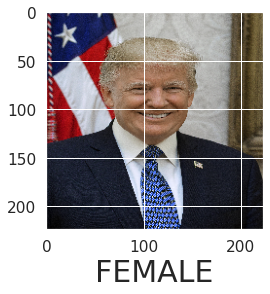

In [86]:
predictImage("trump.jpeg")

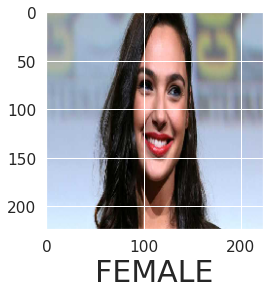

In [87]:
predictImage("gal.jpeg")

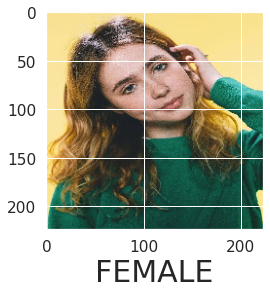

In [88]:
predictImage("clairo.jpeg")

## With Pertubation

In [89]:
def predictImage(filename):
    data = []
    class_num = 0
    path = filename
    img_arr = cv2.imread(filename)[...,::-1] #convert BGR to RGB format
    resized_arr = cv2.resize(img_arr, (img_size, img_size)) # Reshaping images to preferred size
    data.append([resized_arr, class_num])
    val = model_pert.predict_classes(x_k)[0]
    
    img1 = image.load_img(filename,target_size=(img_size,img_size))
    plt.imshow(img1)
    if val == 1:
        plt.xlabel("MALE",fontsize=30)
    elif val == 0:
        plt.xlabel("FEMALE",fontsize=30)

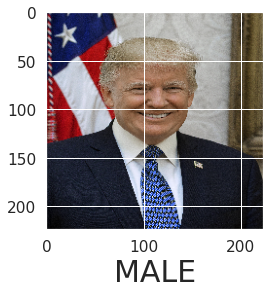

In [90]:
predictImage("trump.jpeg")

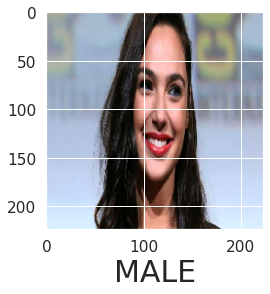

In [91]:
predictImage("gal.jpeg")

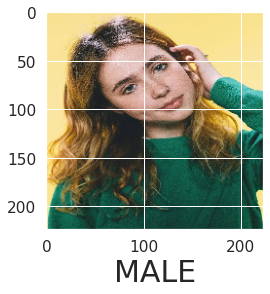

In [92]:
predictImage("clairo.jpeg")